In [7]:
import pandas as pd
merged_feature_df = pd.read_csv('/home/dts/Documents/hu/jraph_MPEU/other_models/elem_rf/merged_df_ml_ready.csv')

In [8]:
# Drop columns with NaN for now:

merged_feature_df = merged_feature_df.dropna()
y_data = merged_feature_df['Egap']
merged_feature_df = merged_feature_df.drop(columns=['Egap'])

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    merged_feature_df, y_data, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


regr = RandomForestRegressor(max_depth=50, random_state=42, max_features="sqrt", min_samples_leaf=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# Now get statistics on the fit:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'The mean absolute error of the fit is: {mean_absolute_error(y_test, y_pred)}')
print(f'The root mean squared error of the fit is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'The r2 of the fit is: {r2_score(y_test, y_pred)}')

The mean absolute error of the fit is: 0.042989900045619575
The root mean squared error of the fit is: 0.11502533661297232
The r2 of the fit is: 0.9354678811052263


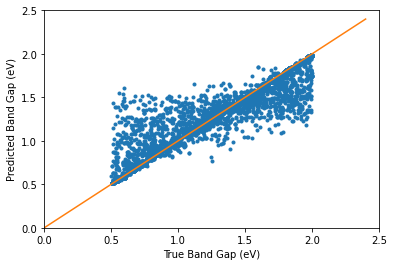

In [11]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')
plt.xlim([0.0, 2.5])
plt.ylim([0.0, 2.5])
plt.xlabel('True Band Gap (eV)')
plt.ylabel('Predicted Band Gap (eV)')
x = np.arange(0, 2.5, 0.1)
plt.plot(x, x, '-')

# What happens when you estimate the mean

In [12]:
# What happens if we simply predict the mean of the data? What MAE do we get?
y_mean = np.mean(y_train)
y_mean_vec = np.ones(len(y_test))*y_mean
print(f'The mean absolute error of predicting the mean is: {mean_absolute_error(y_test, y_mean_vec)}')

The mean absolute error of predicting the mean is: 0.39945649017855794


# Linear Model

 the regression test R2 score is: 0.5681937614406031
The reg.coef_ is: [-9.45578466e-01 -1.99639439e-01  6.65215830e-01  3.25904336e-01
  3.03302651e-01  3.92452889e-02  5.34365484e-01 -5.27559128e-01
  3.20441962e-01 -8.09300623e-02  2.86612420e-01  5.23615705e-01
  2.31062832e-01 -1.92597432e-02  3.28221703e-01 -7.55352471e-02
  5.21515034e-02  1.07917128e-02 -1.53779197e-01  2.93795920e-02
 -6.59159420e-02 -7.74257355e-03  3.63145309e-02  1.82266355e-02
 -3.15467942e-01 -1.83878830e-01 -1.02072369e+01 -4.01932036e+00
  3.32410971e-01  1.42492733e+00 -2.44980374e-01  1.59067790e-01
 -2.22997027e-04 -4.76109692e-05  3.76780099e-02  2.16994123e-02
  1.68709116e-01 -7.46617950e-02  4.32516303e-01 -3.60798719e-02
 -1.56844841e-01  2.46607232e-01  7.54761081e-01 -4.19241216e-01
 -2.83264251e+00  4.74618148e-01  5.06816631e+00 -1.83009528e+00
 -2.68278653e-01  3.74320504e-02  8.72228432e-04  1.40806145e-04
 -8.54538355e-02 -1.53417316e-02 -4.50690701e-05]
The reg.intercept_ is {reg.interce

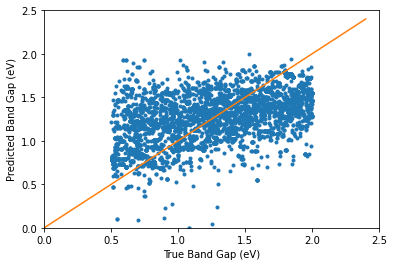

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(f' the regression test R2 score is: {reg.score(X_test, y_test)}')
print(f'The reg.coef_ is: {reg.coef_}')
print('The reg.intercept_ is {reg.intercept_}')

y_pred= reg.predict(X_test)

print(f'The mean absolute error of the fit is: {mean_absolute_error(y_test, y_pred)}')
print(f'The mean root squared error of the fit is: {np.sqrt(mean_squared_error(y_test, y_pred))}')
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, '.')
plt.xlim([0.0, 2.5])
plt.ylim([0.0, 2.5])
plt.xlabel('True Band Gap (eV)')
plt.ylabel('Predicted Band Gap (eV)')
x = np.arange(0, 2.5, 0.1)
plt.plot(x, x, '-')